<a href="https://colab.research.google.com/github/harishraj2108/prediction--project/blob/main/climate_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

***LOADING THE DATA***

In [ ]:
df = pd.read_csv("DailyDelhiClimateTrain.csv")
df.head(10)

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
5,2013-01-06,7.000000,82.800000,1.480000,1018.000000
6,2013-01-07,7.000000,78.600000,6.300000,1020.000000
7,2013-01-08,8.857143,63.714286,7.142857,1018.714286
8,2013-01-09,14.000000,51.250000,12.500000,1017.000000
9,2013-01-10,11.000000,62.000000,7.400000,1015.666667


In [ ]:
df.tail(10)

,date,meantemp,humidity,wind_speed,meanpressure
1452,2016-12-23,15.550000,74.700000,1.205000,1014.250000
1453,2016-12-24,17.318182,78.636364,5.236364,1011.318182
1454,2016-12-25,14.000000,94.300000,9.085000,1014.350000
1455,2016-12-26,17.142857,74.857143,8.784211,1016.952381
1456,2016-12-27,16.850000,67.550000,8.335000,1017.200000
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000
1461,2017-01-01,10.000000,100.000000,0.000000,1016.000000


**HERE WE GET THE STATISTICAL VALUE OF THE DATA FOR MODEL SELECTION**

In [ ]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


**CHECK FOR NULL VALUES IN THE DATA, IF NULL VALUES ARE PRESENT WE HANDLE THEM BY REPLACING SUFFICIENT VALUES
**

In [ ]:
df.isnull().sum()

,0
date,0
meantemp,0
humidity,0
wind_speed,0
meanpressure,0


**AFTER ANALYSES THERE IS NO NULL VALUES PRESENT IN THE DATA SET**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scale = StandardScaler()
list1 = ['meantemp','humidity']
df[list1] = scale.fit_transform(df[list1])
df.head(10)

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,-2.109500,1.415439,0.000000,1015.666667
1,2013-01-02,-2.463454,1.862828,2.980000,1017.800000
2,2013-01-03,-2.495219,1.564569,4.633333,1018.666667
3,2013-01-04,-2.291015,0.630022,1.233333,1017.166667
4,2013-01-05,-2.654044,1.554627,3.700000,1016.500000
5,2013-01-06,-2.517908,1.314031,1.480000,1018.000000
6,2013-01-07,-2.517908,1.063492,6.300000,1020.000000
7,2013-01-08,-2.265084,0.175531,7.142857,1018.714286
8,2013-01-09,-1.564956,-0.567988,12.500000,1017.000000
9,2013-01-10,-1.973364,0.073270,7.400000,1015.666667


**WE SCALE THE VALUES TO INCREASE ACCURACY OF THE MODEL**

In [ ]:
df.dtypes

,0
date,object
meantemp,float64
humidity,float64
wind_speed,float64
meanpressure,float64


FOR TRAINING AND TO INCREASE ACCURACY OF THE MODEL, WE REMOVE THE OBJECT DATATYPES. THE DATA TYPES CAN BE OF INT , FLOAT OR DATETIME FOR BETTER ANALYSIS

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

,0
date,datetime64[ns]
meantemp,float64
humidity,float64
wind_speed,float64
meanpressure,float64


In [ ]:
core  = df.corr()

**WE PLOT THE CORRELATION BETWEEN THE VALUES IN HEATMAP**

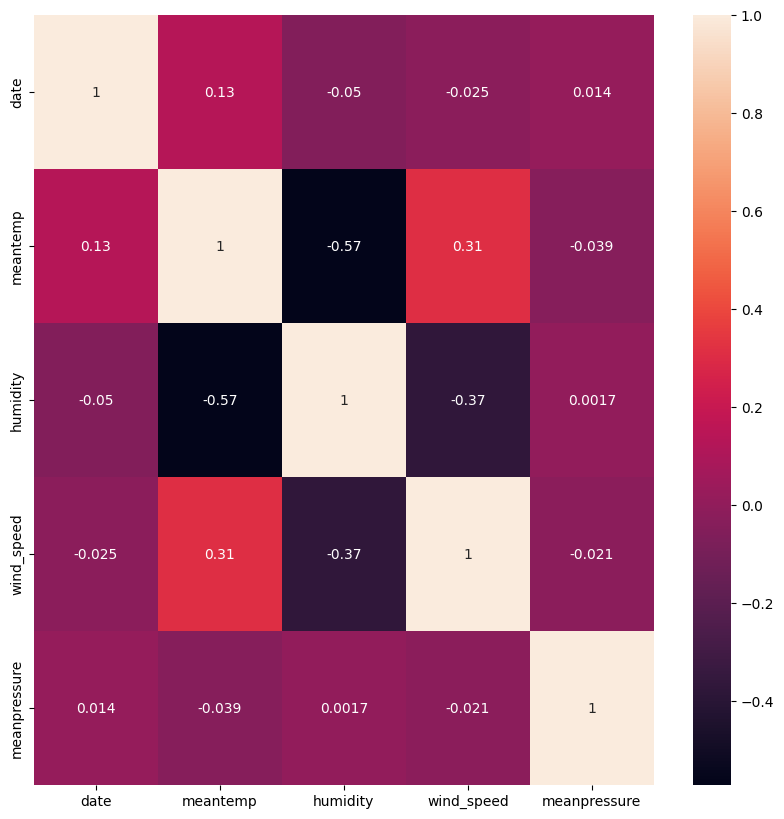

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10,10))
sns.heatmap(core,annot=True)
plt.show()

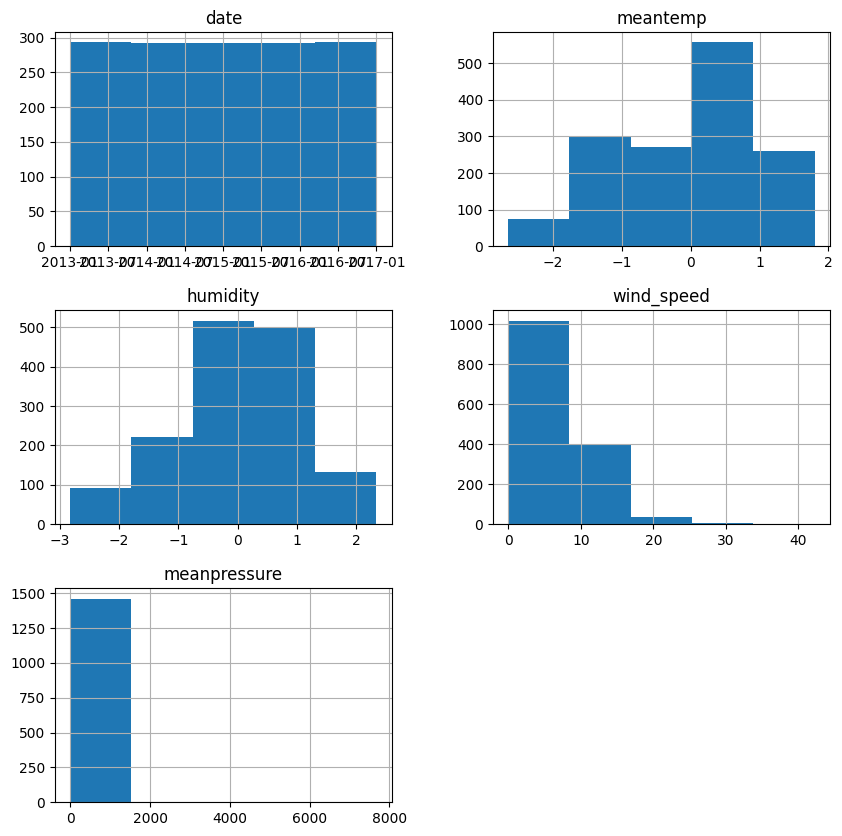

In [ ]:
df.hist(figsize=(10,10),bins =5)
plt.show()

In [ ]:
x = df.drop('meantemp',axis = 1)
y = df['meantemp']

In [ ]:
x

,date,humidity,wind_speed,meanpressure
0,2013-01-01,1.415439,0.000000,1015.666667
1,2013-01-02,1.862828,2.980000,1017.800000
2,2013-01-03,1.564569,4.633333,1018.666667
3,2013-01-04,0.630022,1.233333,1017.166667
4,2013-01-05,1.554627,3.700000,1016.500000
...,...,...,...,...
1457,2016-12-28,0.433776,3.547826,1015.565217
1458,2016-12-29,1.615699,6.000000,1016.904762
1459,2016-12-30,1.723641,6.266667,1017.904762
1460,2016-12-31,1.564569,7.325000,1016.100000


In [ ]:
y


,meantemp
0,-2.109500
1,-2.463454
2,-2.495219
3,-2.291015
4,-2.654044
...,...
1457,-1.126952
1458,-1.396406
1459,-1.551990
1460,-1.421654


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(x_train.drop('date', axis=1),y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(x_test.drop('date', axis=1))

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

accuracy = r2_score(y_test,y_pred)
print(accuracy * 100)

86.5886693829229


In [ ]:
mean_squared_error(y_test,y_pred)

0.13362057148550952

In [ ]:
y_pred

array([ 1.25569915, -0.92746321, -1.19160559,  1.62578332, -0.69185102,
        0.68696717,  0.41479778, -0.26528047,  0.56225232,  1.33039818,
        0.88561145,  0.84752299, -1.39104004,  0.77310341,  0.38957456,
       -1.87239466,  0.32837695, -0.86841214, -0.83200012,  0.40543981,
       -1.18392676, -0.04038014, -0.42643694, -1.48336987,  0.28023614,
        1.13073162, -1.04228604,  0.60794705, -0.59704098,  0.30088322,
        0.77479579,  1.40380852,  0.17449038,  0.00828892,  1.0886714 ,
       -0.14806391, -1.45744417, -1.7426618 , -1.08726376,  0.808581  ,
       -0.97502596,  0.73444975, -1.33368628,  0.51275711, -0.49336648,
       -1.45092596,  0.66478469, -1.17114319,  0.93871325,  0.89704911,
        1.01848814,  0.68612239,  0.57865056, -0.13440285, -0.12082502,
        1.56518654,  0.60549945,  1.1507023 , -1.05043766,  1.41008374,
       -1.18033486,  0.71498407, -0.72665892, -1.36254381,  0.83235524,
        0.81122512, -1.8769617 ,  0.43655849, -1.20931192,  0.30